# ANALYSE DE DONNEES MOVIES

## Table des matières

### Introduction

Dans ce notebook, on étudie des données de "The Movie Database" (TMDb) disponible sur [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). Cet ensemble de données contient des informations sur 10 000 films collectés à partir de The Movie Database (TMDb), y compris les notes des utilisateurs et les revenus. 

#### Questions pour analyses.
Nous allons repondre aux question de recherches suivantes tout au long de notre analyse:
- Quelle corrélation existe entre les diférentes variables de la dataframe?
- Quels sont les films les plus long et le plus courts de cet ensemble de données? 
- Quels réalisateurs ont fait le plus de films?

In [2]:
#### Chargemet de des paquets

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Importation des donées

df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
len(df.query("budget==0"))

5696

### Description des données
Aprés l'importation de la dataframe, TMdb, nous allons passer à description de colones et des lignes de la dataframe.

#### Inspection générale

In [16]:
# Afficher les 5 derniéres lignes de la dataframe

df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [18]:
# Afficher les dimensions de la dataframe

df.shape

(10866, 21)

In [19]:
# Afficher le non des colonnes de la dataframe

df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [20]:
# Afficher le type des données de la dataframe

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [21]:
# Inspecter les colonnes contenants des valeurs manquantes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [22]:
# Statistiques descriptives

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Inspection de cohérene

In [23]:
# Compter les lignes dupliquées

df.duplicated().sum()

1

In [24]:
# Afficher les observations uniques

df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### Afficher les valeurs dupliquées pour chaque variable (imdb_id, tagline, cast, revenue_adj, budget_adj).


In [25]:
df.imdb_id.duplicated().sum()

10

In [26]:
df.cast.duplicated().sum()

146

In [27]:
df.tagline.duplicated().sum()

2868

In [28]:
df.revenue_adj.duplicated().sum()

6026

In [29]:
df.budget_adj.duplicated().sum()

8252

### Nettoyage des données

In [ ]:
# Supprimer certaines colonnes non pertinantes pour l'analyse

# La colonne "imdb_id" n'est pas pertinantes car elle contient des chiffres et du texte assez aléatoires pouvant servir de Id. De plus la colonne "id" existe déja.
# La colonne "homepage" n'est pas pertinante car elle contient trop de données manquantes de types texte(donc impossible de calculer un moyenne)
# Les colonnes "budget_adj", "revenue_adj" et "tag_line"  car contiennent beaucoup de valeurs dupliquées

In [30]:
df.drop(columns = ['homepage', 'imdb_id', 'tagline', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [31]:
# Statistiques descriptives

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


### Exploration des données

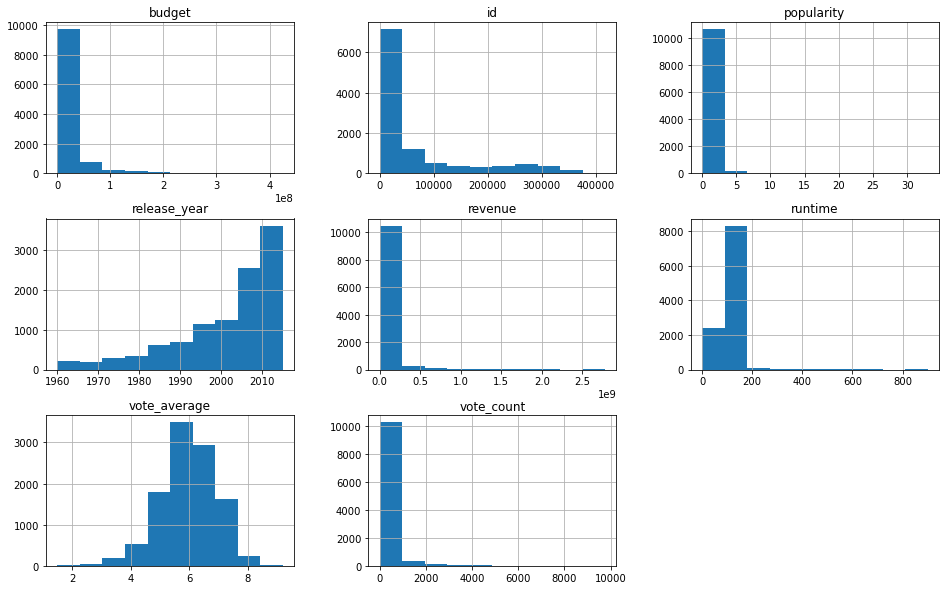

In [32]:
# Histogramme des variables de la dataframe.

df.hist(figsize = (16, 10));

##### La fonction hist(), nous permet de comprendre la distribution des données dans notre série.

#### Quelle corrélation existe entre les diférentes variables de la dataframe?

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000


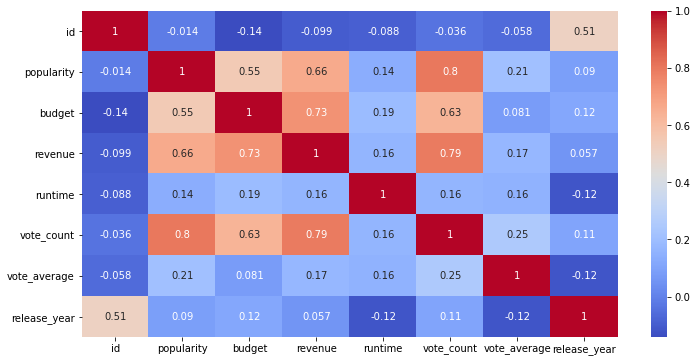

In [35]:
data = df.corr()
plt.figure(figsize = (12, 6))
sns.heatmap(data, cmap = "coolwarm", annot = True)
data

##### La matrice de corrélation indique la dépendence entre les differentes colonnes de notre série. Plus la valeur se rapproche de 1, plus la dépendence est forte.

#### Quels sont les films les plus long et le plus courts de cet ensemble de données? 

In [36]:
print(df.original_title[df.runtime == df.runtime.max()])
print(df.runtime[df.runtime == df.runtime.max()])

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object
3894    900
Name: runtime, dtype: int64


In [37]:
print(df.original_title[df.runtime == df.runtime.min()])
print(df.runtime[df.runtime == df.runtime.min()])

92           Mythica: The Necromancer
334                           Ronaldo
410                    Anarchy Parlor
445     The Exorcism of Molly Hartley
486                If There Be Thorns
595                         Deep Dark
616                      The Outfield
1241                        Dance-Off
1289                        Treehouse
1293                         Tim Maia
1849                     Spectacular!
2315             Listen to Your Heart
2370                  Freshman Father
3329         Grande, grosso e Verdone
3794             Toi, moi, les autres
3857                         Cell 213
3884                           eCupid
4063           Madea's Family Reunion
4138               A Time for Dancing
4829                             Rags
4944              How to Fall in Love
5216            Madea's Class Reunion
5695                 Skinwalker Ranch
5920           The Food Guide to Love
5938                      Go Goa Gone
5992                 Amiche da morire
6040        

##### Nous procédons à un classement des films selon leurs durées. Nous obtenons donc les films, les plus longs d'une part et les plus courts d'un autre.

#### Quels réalisateurs ont fait le plus de films?

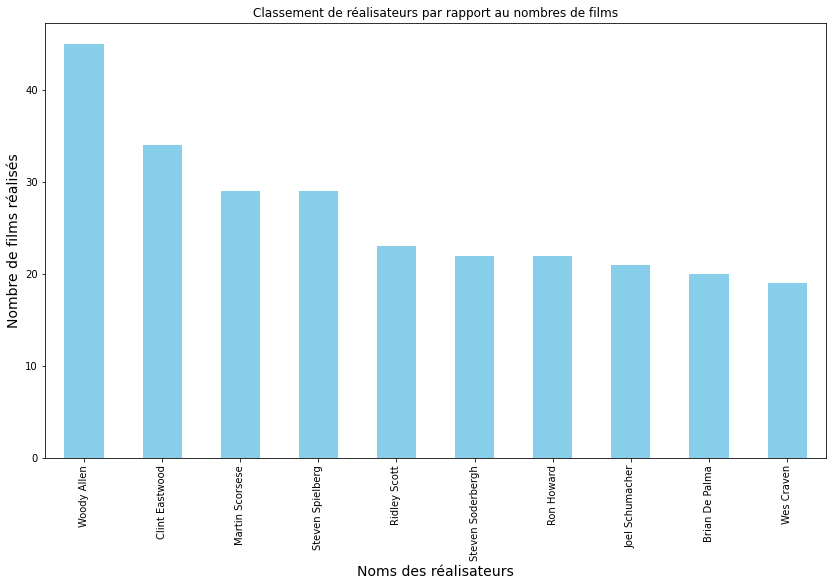

In [5]:
df['director'].value_counts().head(10).plot(figsize = (14, 8), kind='bar', color = 'skyblue')
plt.title('Classement de réalisateurs par rapport au nombres de films')
plt.xlabel("Noms des réalisateurs", fontsize=14 ) 
plt.ylabel("Nombre de films réalisés", fontsize=14)
plt.show()

##### Nous recherchons un classement pour les réalisateurs. L'objectifs est de savoir, par rapport à notre série de données qui sont, ceux qui ont réalisés le plus de films.

### Examen des limitations de la serie de données

#### Observation du dataframe

In [7]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


##### Nous observons que sur les colonnes "budget"  et "revenue" qu'il y a des valeurs égal à 0. Sachant qu'un film ne peut pas avoir un budget et des revenues à 0, nous allons analyser c'est 2 colonnes.

#### Fonction pour le calcul des pourcentages de présence de 0 sur les colonnes "budget" et "revenue" sur la série de données

In [8]:
def pourcentage(colonne):
    count_zero = (df[colonne]==0).sum()
    count_ligne_tot=len(df.index)
    pourc_zero= (count_zero/count_ligne_tot)*100
    return pourc_zero

In [9]:
pourcentage('budget')

52.42039388919566

In [10]:
pourcentage('revenue')

55.365359838026876

##### Nous pouvons remarquer que les pourcentages de présence des valeurs 0 font plus de la moitié pour de l'intégralité des données. Le calcul d'une moyenne, même si elle peut se faire, ne sera pas objectives. La présence de ces données abérrantes sur les colonnes "budget" et "revenue" peuvent représenter des limites.

### Conclusion

##### L'analyse de notre dataset nous a permis de resortir des informations sur les films.

##### Nous avons donc compris qu'il y' a une forte dépendance en la popularité et les appréciations obtenues par le film. Nous comprenons grace à la correlation que la popularité d'un film ne dépend pas de son année de sortie.

##### De plus le film le plus long de notre dataset est : The Story of Film: An Odyssey et celui le plus court reste : Mythica: The Necromancer.

##### Par ailleurs nous pouvons retenir que Woody Allen a réalisé le plus de films issue de notre dataset devant Clint Eastwood et Martin Scorsese.

##### En termes de limitation sur cette série de données, nous pouvons noter la présence de données aberrantes tels que 0 sur les colonnes "budget" et "revenue". L'incohérence des ces données nous limite dans l'analyse, dans le sens où nous ne pourrons pas répondre avec exactitudes aux questions comme : Quels sont les films aux plus petits/grands budgets?  Quels sont les films aux plus petits/grands revenues? Quels corrélation y'a t-il entre le revenue et la popularité d'un film .... 